In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

In [47]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1. Line Plot(꺾은선 그래프)

연속적으로 변화하는 값을 순서대로 점으로 나타내고, 이를 선으로 연결한 그래프

* 시간/순서에 대한 변화에 적합하여 추세를 살피기 위해 사용
* `.plot()`
* 5개 이하의 선을 사용하는 것을 권장

#### 구별하는 요소
1. 색상(color)
2. 마커(marker, markersize) : [마커의 종류](https://matplotlib.org/stable/api/markers_api.html)
3. 선의 종류(linestyle, linewidth) : `solid`, `dashed`, `dashdot`, `dotted`, `None`


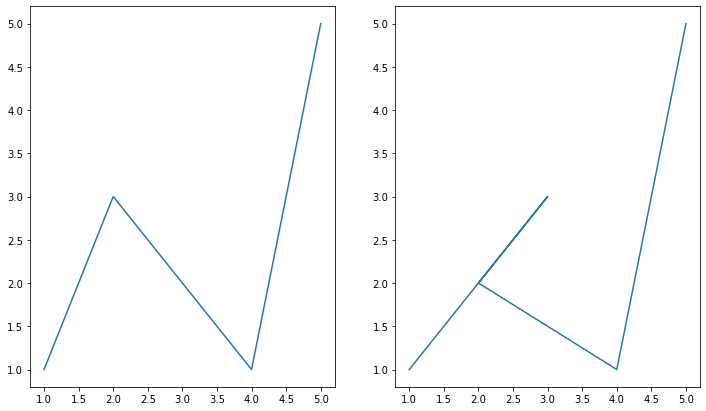

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

x1 = [1, 2, 3, 4, 5]
#x축은 정렬해서 사용하자.
x2 = [1, 3, 2, 4, 5]
y = [1, 3, 2, 1 ,5]

axes[0].plot(x1, y)
axes[1].plot(x2, y)

plt.show()

수학적인 테크닉으로 원도 그릴 수 있다.

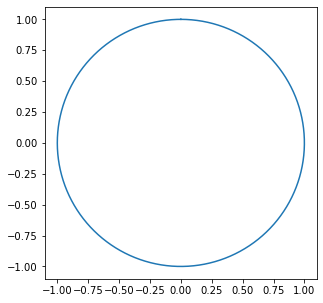

In [10]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, aspect=1)

n = 1000
x = np.sin(np.linspace(0, 2*np.pi, n))
y = np.cos(np.linspace(0, 2*np.pi, n))

ax.plot(x, y)

plt.show()

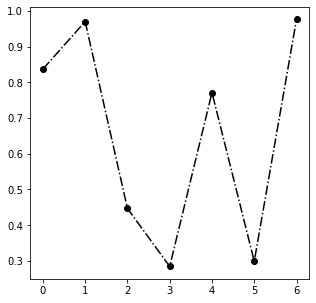

In [3]:
fig , ax = plt.subplots(1, 1, figsize=(5, 5))

np.random.seed(97)

x = np.arange(7)
y = np.random.rand(7)

ax.plot(x,y,
       color = 'black',
       marker='o',
       linestyle='dashdot') # linestyle="--,:,-"

plt.show()

In [6]:
stock = pd.read_csv('./prices.csv')
stock['date'] = pd.to_datetime(stock['date'], format='%Y-%m-%d', errors='raise')
stock.set_index("date", inplace=True)
stock

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0


In [ ]:
apple = stock[stock['symbol']=="AAPL"]
google = stock[stock['symbol']=="GOOGL"]
google.head()

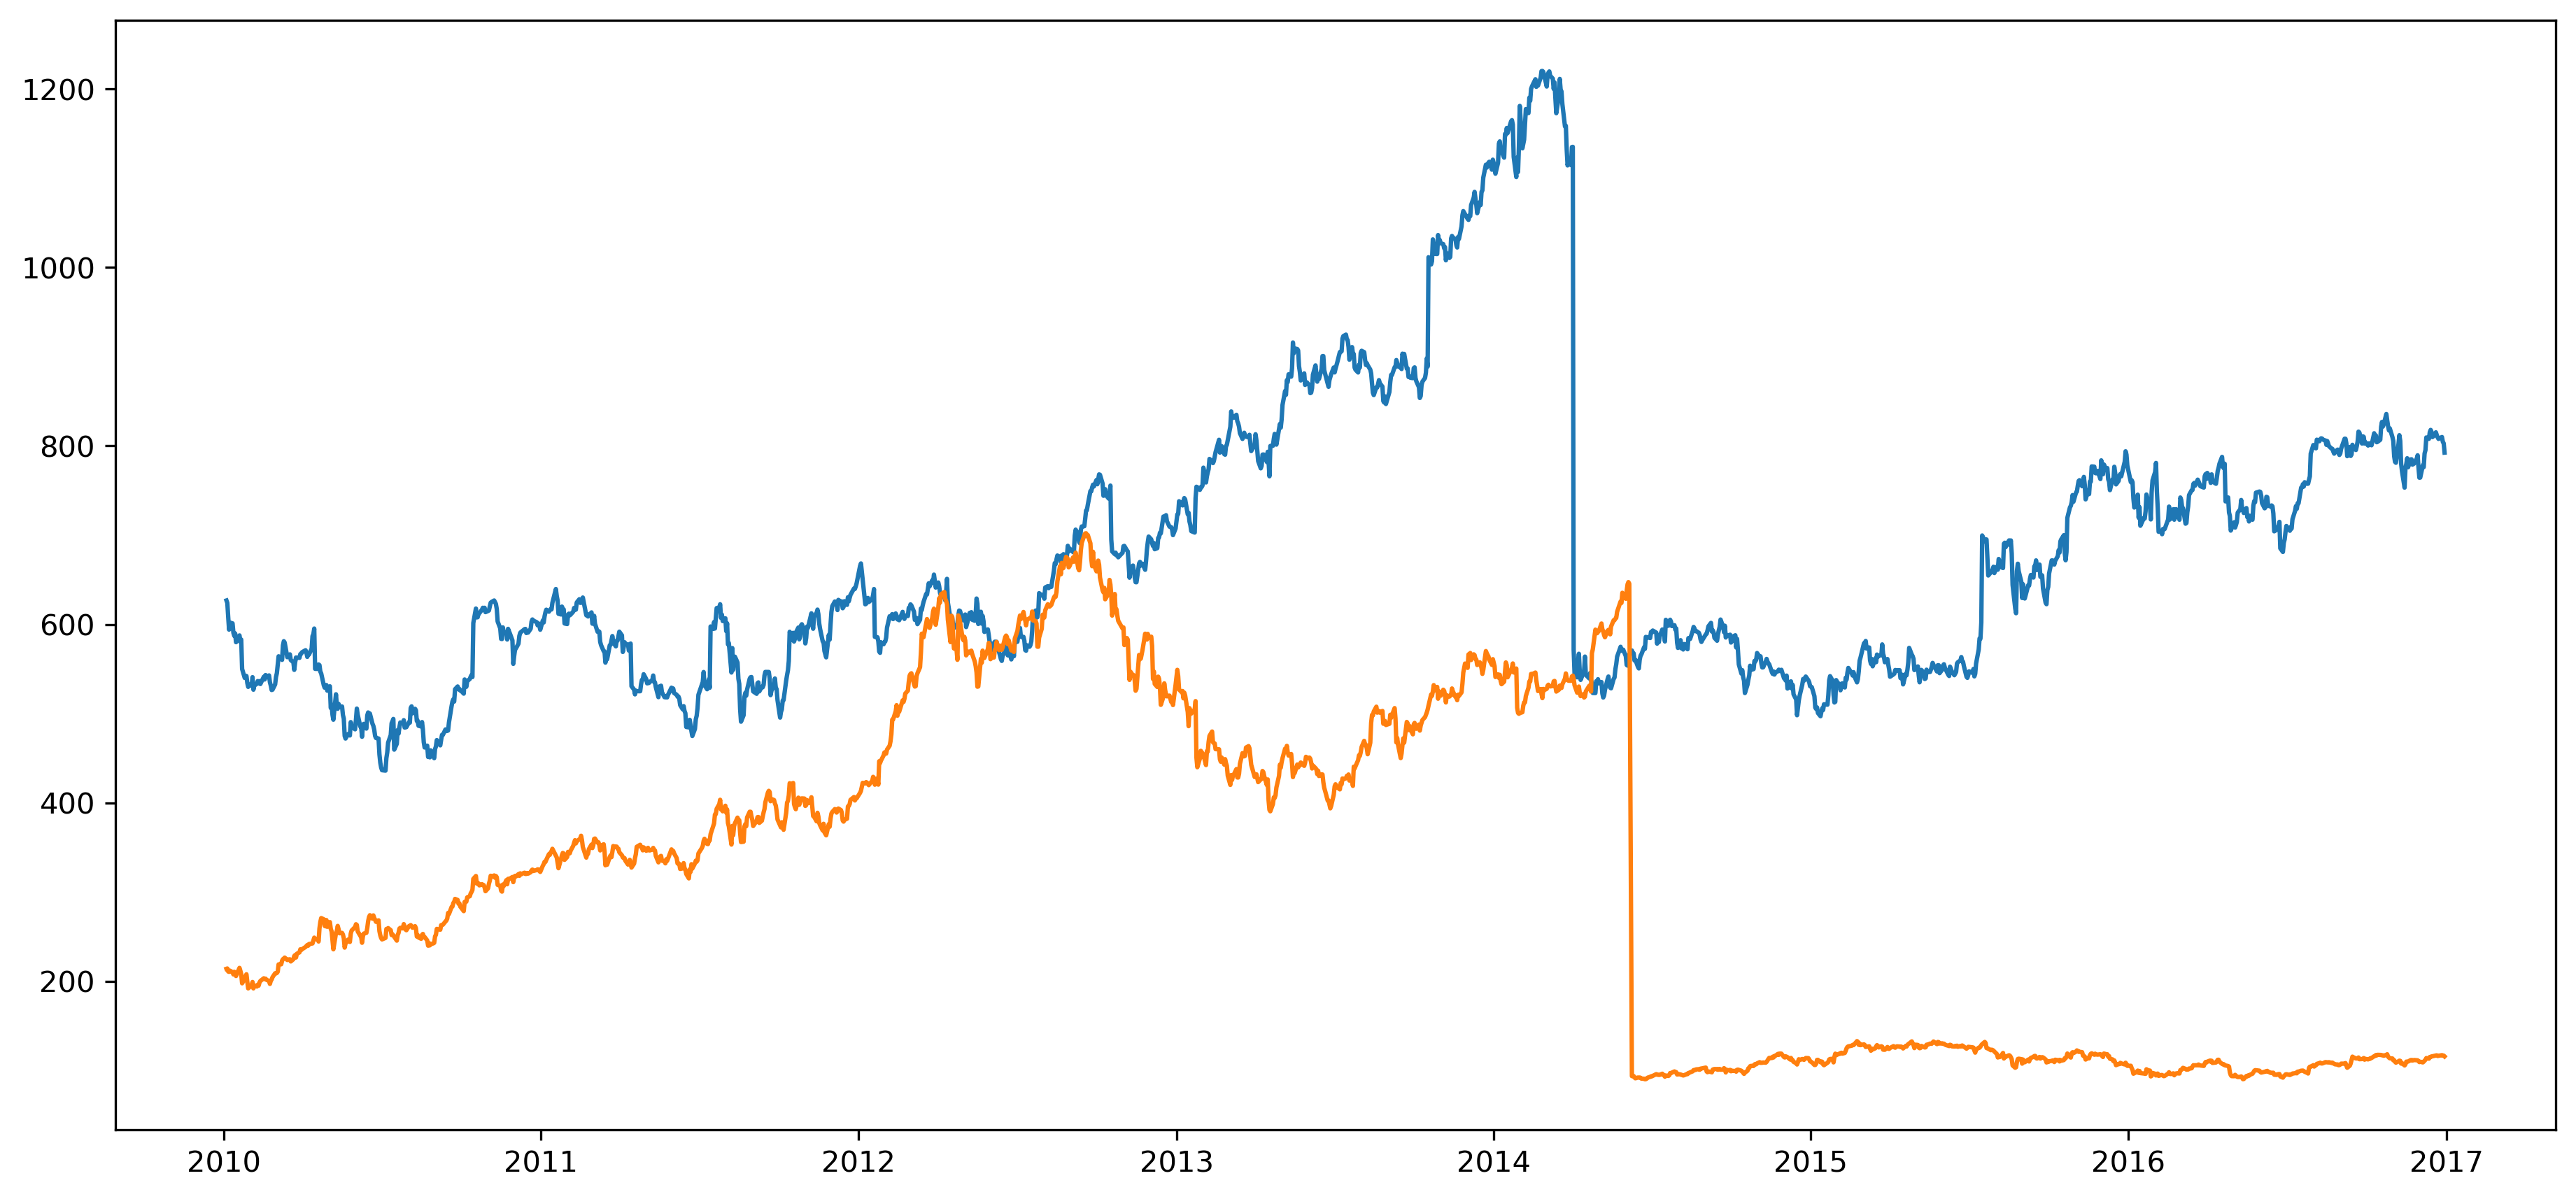

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7), dpi=300)

ax.plot(google.index, google['close'])
ax.plot(apple.index, apple['close'])

plt.show()

#### 1.1. Line plot을 위한 전처리

* 시시각각 변동하는 데이터는 Noise로 인해 패턴 및 추세 파악이 어려움

$\rightarrow$	Noise의 인지적 방해를 줄이기 위해 **smoothing**을 사용

* 판다스에는 이동평균을 위해 `rolling` 메서드가 존재

In [18]:
google_roll = google.rolling(window=10).mean()

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_36512/3501409359.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['symbol'], dtype='object')
  google_roll = google.rolling(window=10).mean()


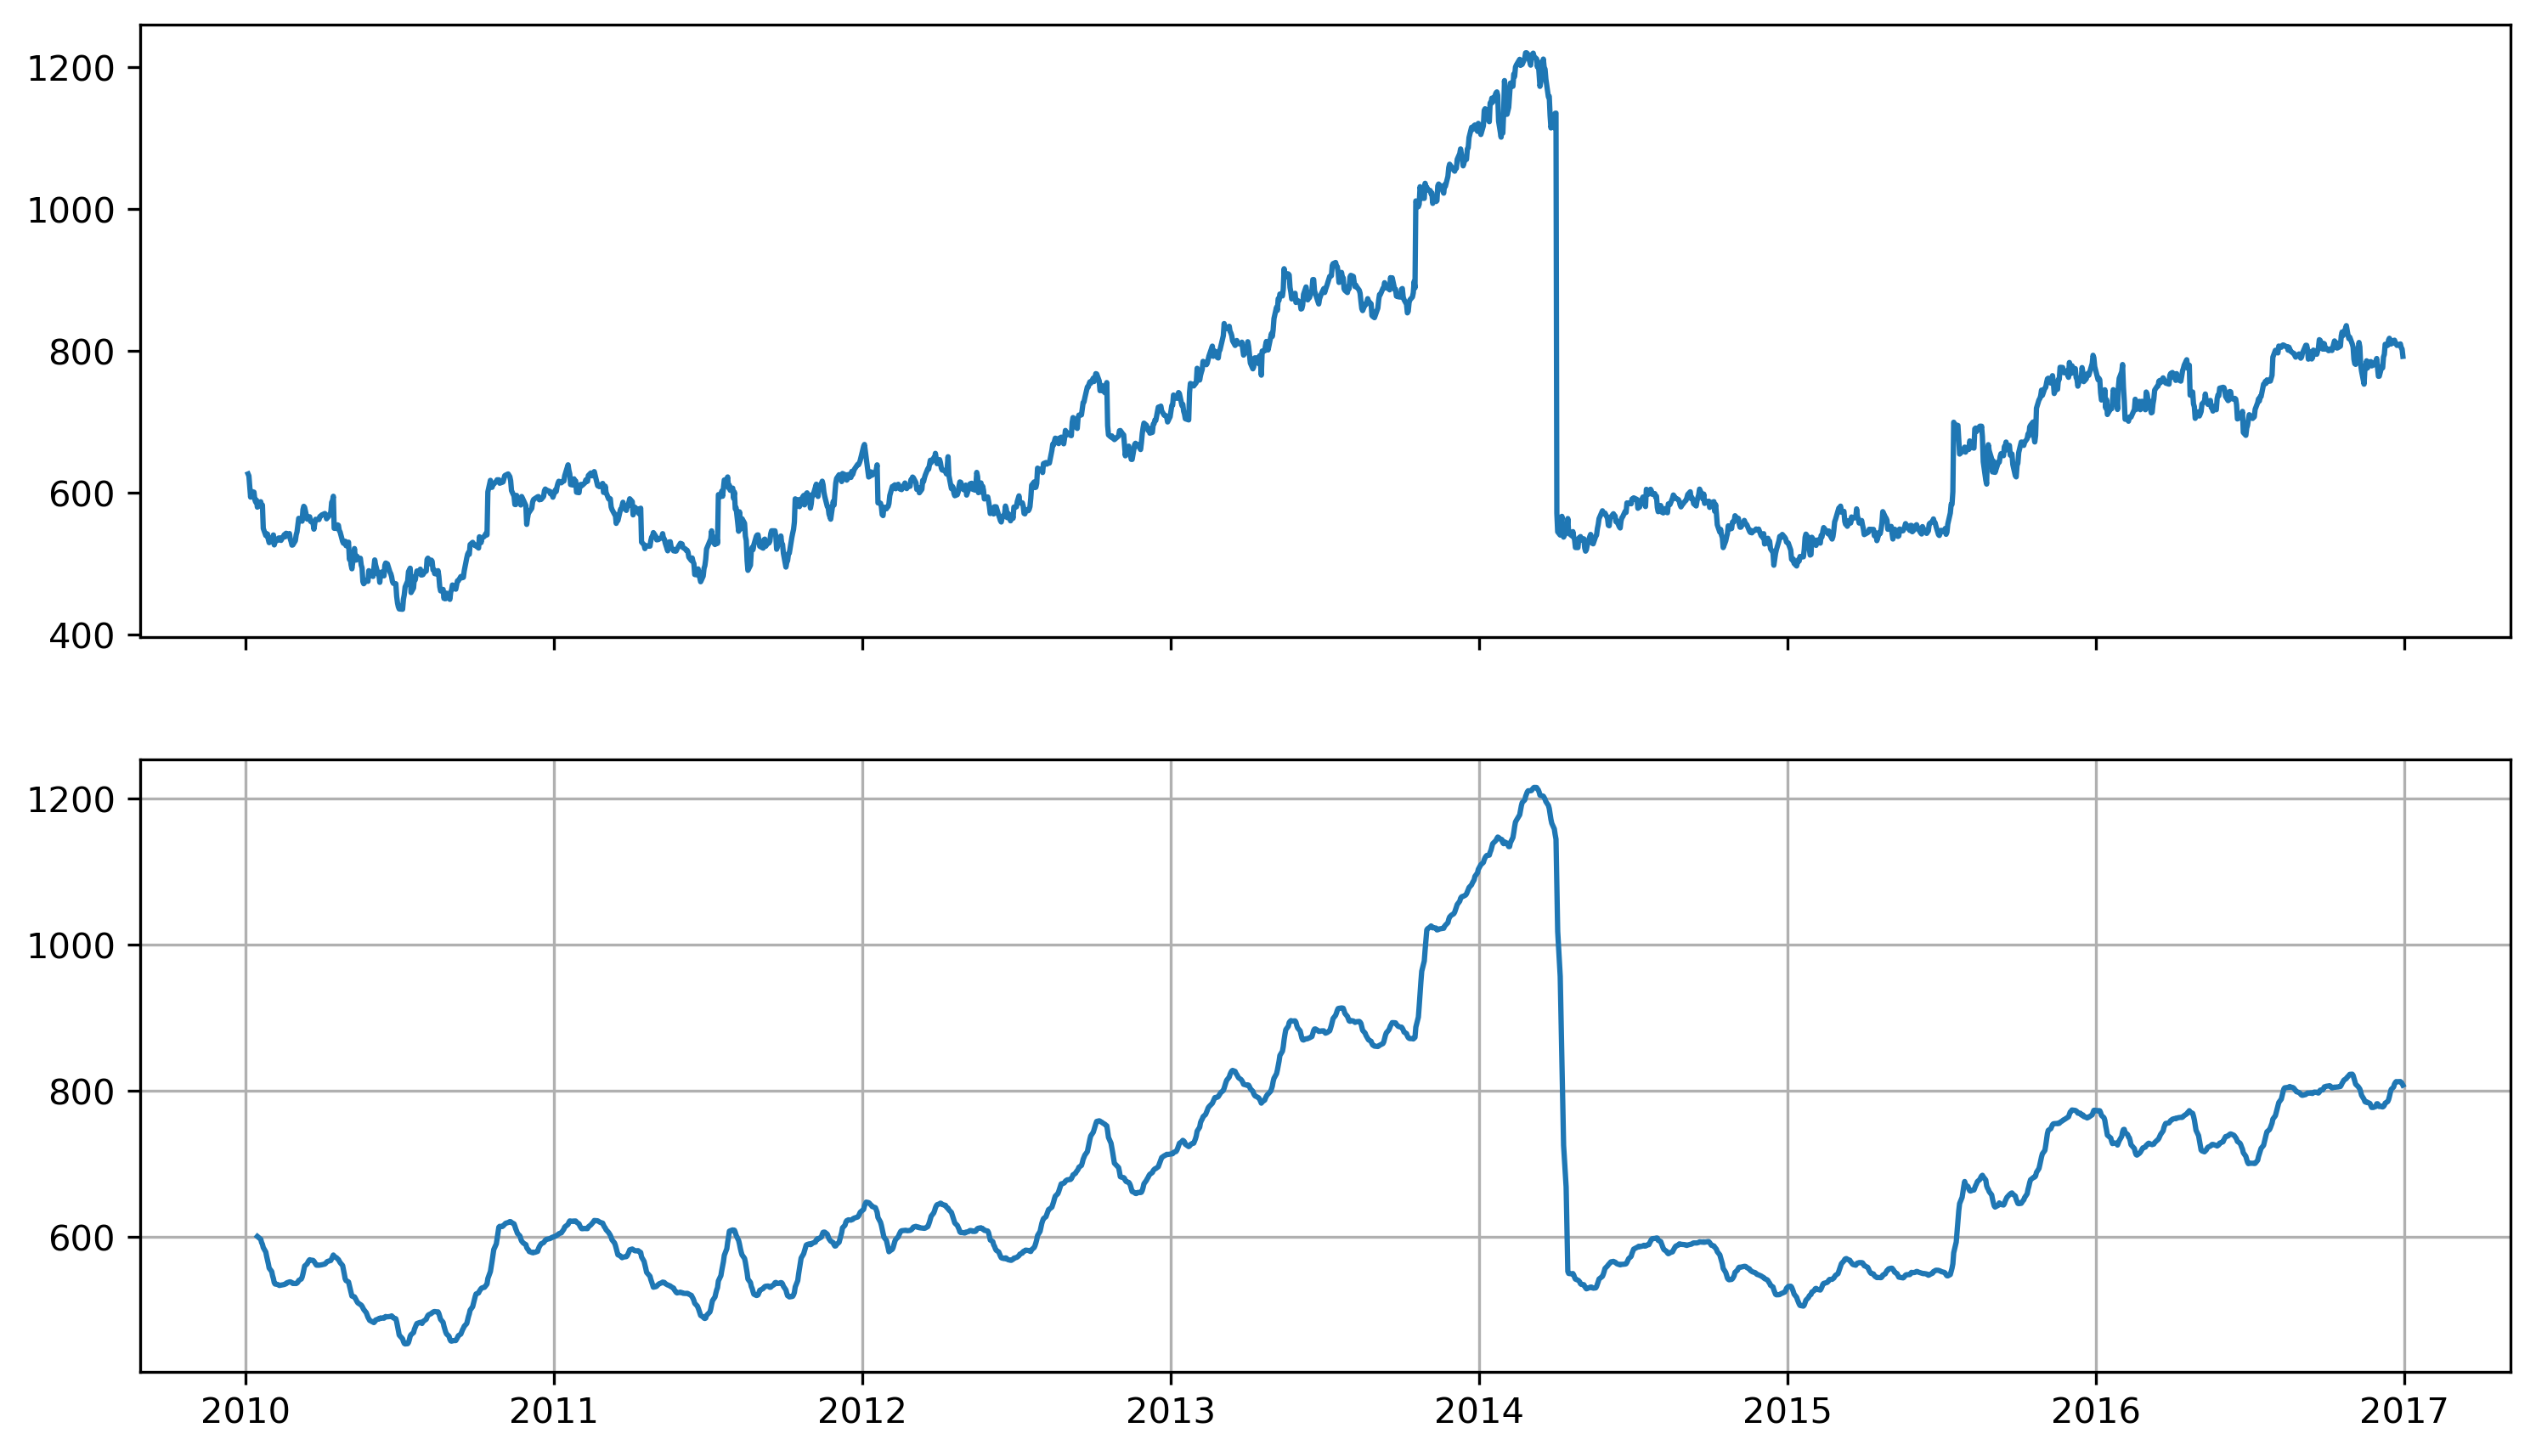

In [51]:
fig, axes = plt.subplots(2, 1, figsize=(12, 7), dpi=300, sharex=True)

axes[0].plot(google.index, google['close'])
axes[1].plot(google_roll.index, google_roll['close'], zorder=20)

axes[1].grid(zorder=50)

plt.show()

#### 2.1. 추세에 집중

* 추세를 보기 위한 목적으로 축을 0에 초점을 둘 필요는 없다.(Ink원칙을 벗어나도 됨)

* 너무 구체적인 정보는 생략한 line plot이 좋다.
    * ex) Grid, Annotate 등 모두 제거, 디테일한 정보는 표로 제공하는것을 추천
    
* 생략되지 않는 선에서 범위를 조정하여 변화율 관찰(`.set_ylim()`)

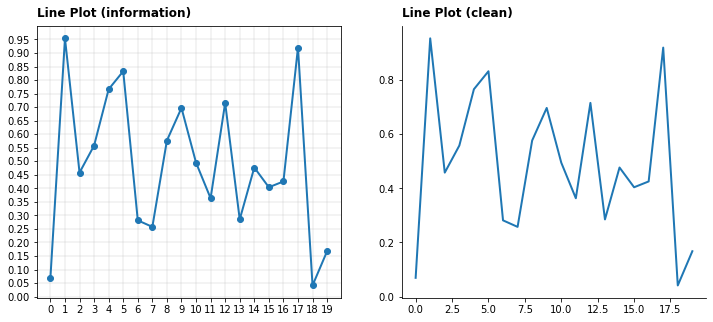

In [22]:
from matplotlib.ticker import MultipleLocator

fig = plt.figure(figsize=(12, 5))

np.random.seed(970725)

x = np.arange(20)
y = np.random.rand(20)

# Ax1
ax1 = fig.add_subplot(121)
ax1.plot(x, y,
        marker="o",
        linewidth=2)

# MultipleLocator : 각 축에 대한 정보를 얼마만큼의 디테일로 나타낼지
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(0.05))
ax1.grid(linewidth=0.3)

# Ax2
ax2 = fig.add_subplot(122)
ax2.plot(x, y,
        linewidth=2,)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.set_title(f"Line Plot (information)",loc="left", fontsize=12,
             va= "bottom", fontweight="semibold")
ax2.set_title(f"Line Plot (clean)",loc="left", fontsize=12,
             va= "bottom", fontweight="semibold")

plt.show()

#### 2.2. 간격

규칙적인 간격이 아니라면 오해를 줄 수 있다.
* 그래프 상에서 규칙적일 때 : 기울기 정보의 오해
* 그래프 상에서 간격이 다를 때 : 없는 데이터에 대해 있다고 오해 

규칙적인 간격의 데이터가 아니라면 **각 관측 값에 점으로 표시**하여 오해를 줄이자.

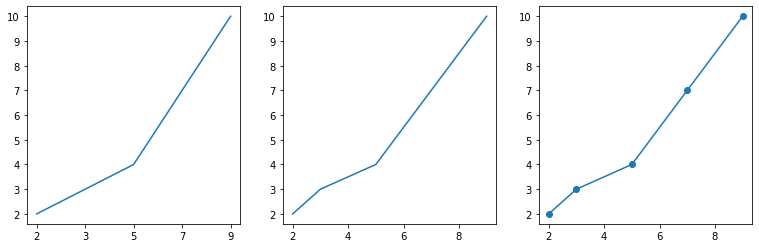

In [23]:
x = [2, 3, 5, 7, 9]
y = [2, 3, 4, 7, 10]

fig, ax = plt.subplots(1, 3, figsize=(13, 4))
ax[0].plot([str(i) for i in x], y) # y값만 있어도 자동으로 그려줌
ax[1].plot(x, y)
ax[2].plot(x, y, marker='o')

plt.show()

#### 2.3. 보간

Line은 점을 이어 만드는 요소 $\rightarrow$ 점과 점 사이에 데이터가 없기에 이를 잇는 방법

* 데이터의 error나 noise가 포함되어 있는 경우, 데이터의 이해를 돕는 방법
    * Moving Average
    * Smooth Curve with Scipy
        * scipy.interpolate.make_interp_spline()
        * scipy.interpolate.interp1d()
        * scipy.ndimage.gaussian_filter1d()
       
Presentation에서는 좋은 방법일 수 있지만
1. 없는 데이터를 있다고 생각하게 착각을 일으킬 수 있고
2. 작은 차이를 없애버릴 수 있다.

그러므로 **일반적인 분석에서는 지양**하자.

[참고자료](https://www.delftstack.com/howto/matplotlib/matplotlib-plot-smooth-curve/)

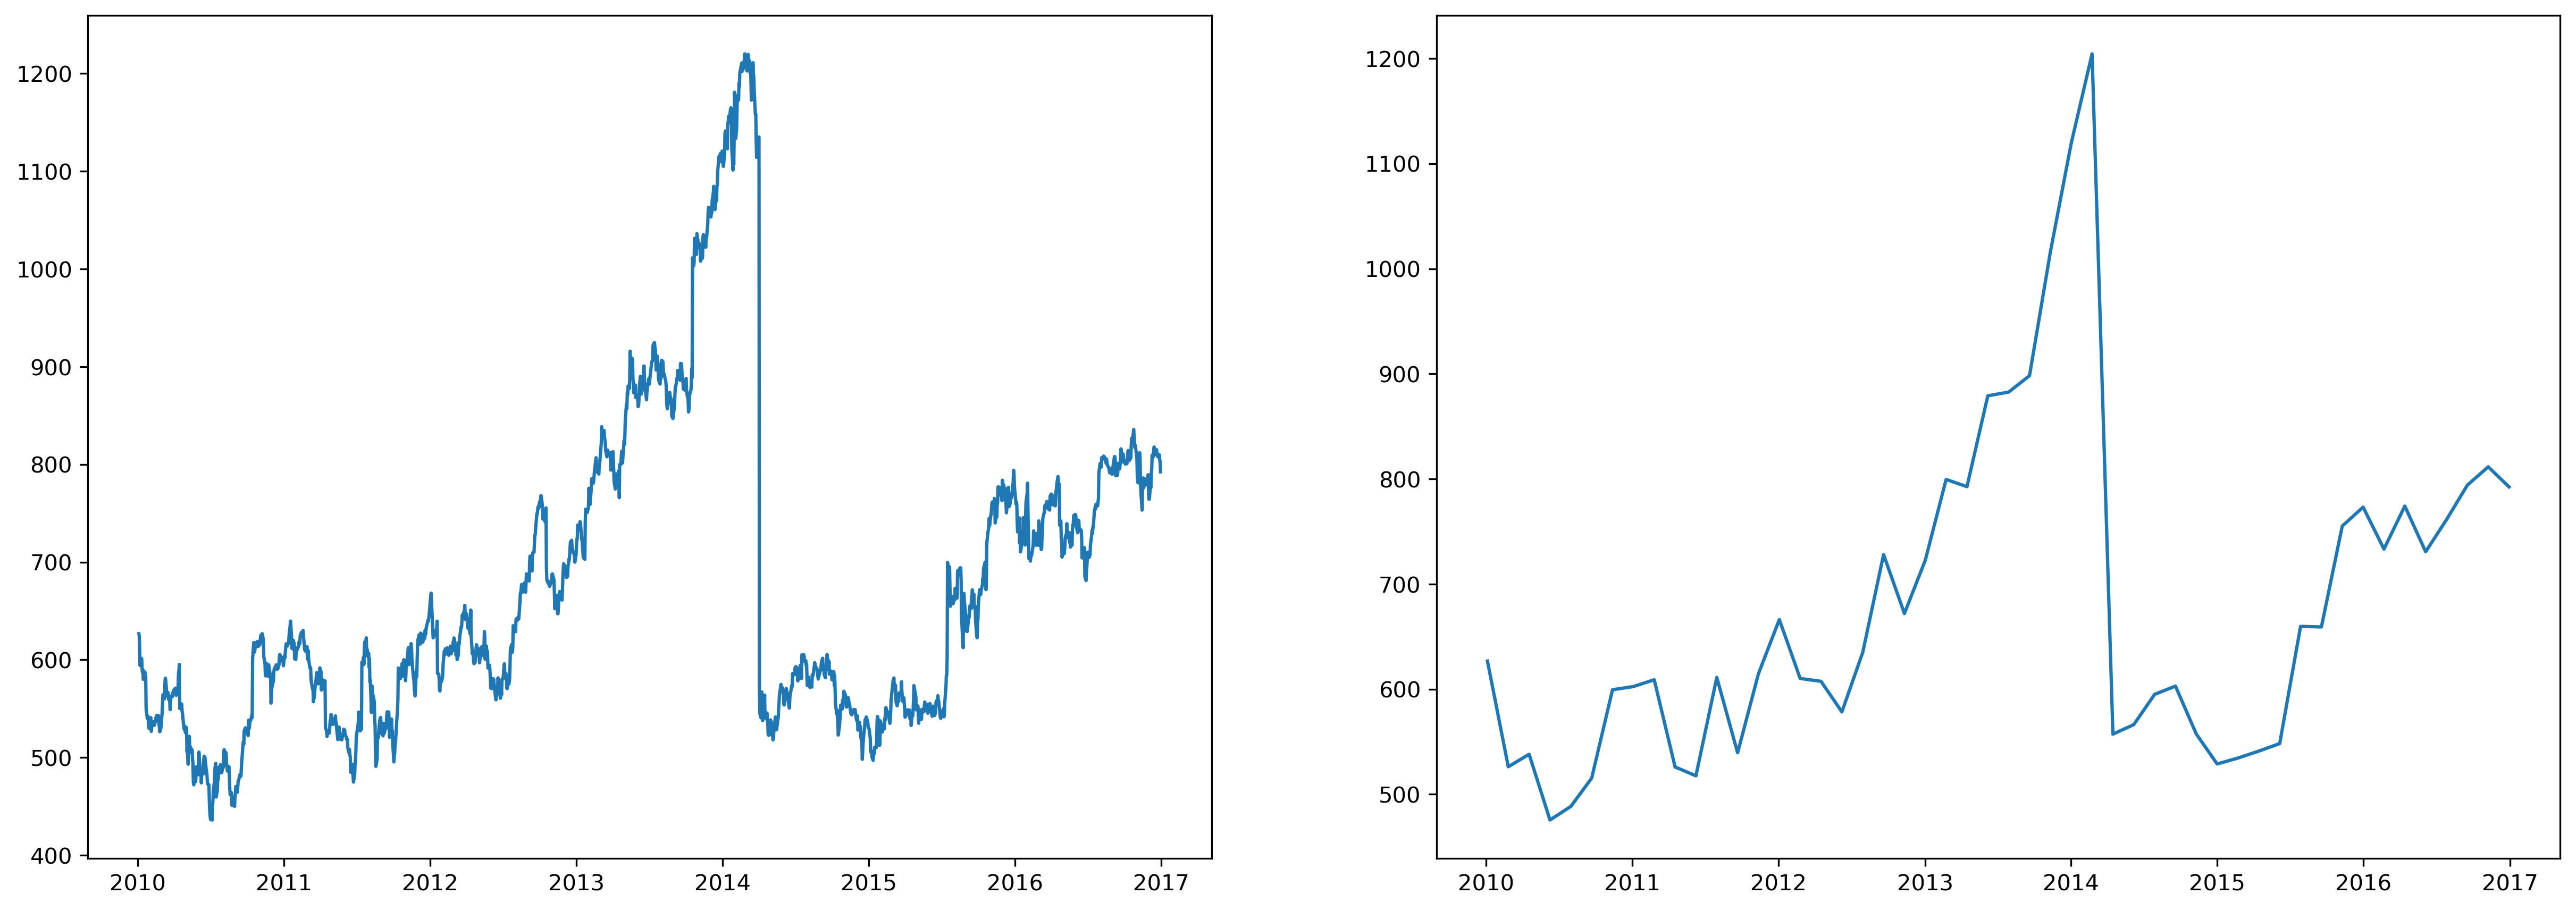

In [28]:
from scipy.interpolate import make_interp_spline, interp1d
import matplotlib.dates as dates

fig, ax = plt.subplots(1, 2, figsize=(20, 7), dpi=300)

date_np = google.index
value_np = google['close']

date_num = dates.date2num(date_np)

# smooth
date_num_smooth = np.linspace(date_num.min(), date_num.max(), 50)
spl = make_interp_spline(date_num, value_np, k=3)
value_np_smooth = spl(date_num_smooth)

# print
ax[0].plot(date_np, value_np)
ax[1].plot(dates.num2date(date_num_smooth), value_np_smooth)

plt.show()

#### 2.4. 이중 축(dual axis) 사용

한 plot에 대해 2개의 축을 이중 축이라고 한다. 그러나 2개의 plot을 그리는게 훨씬 좋다. 이중 축은 지양하자.

* 같은 시간 축에 대해 서로 다른 종류의 데이터를 표현하기 위해 축 2개 사용
    * `.twinx()`

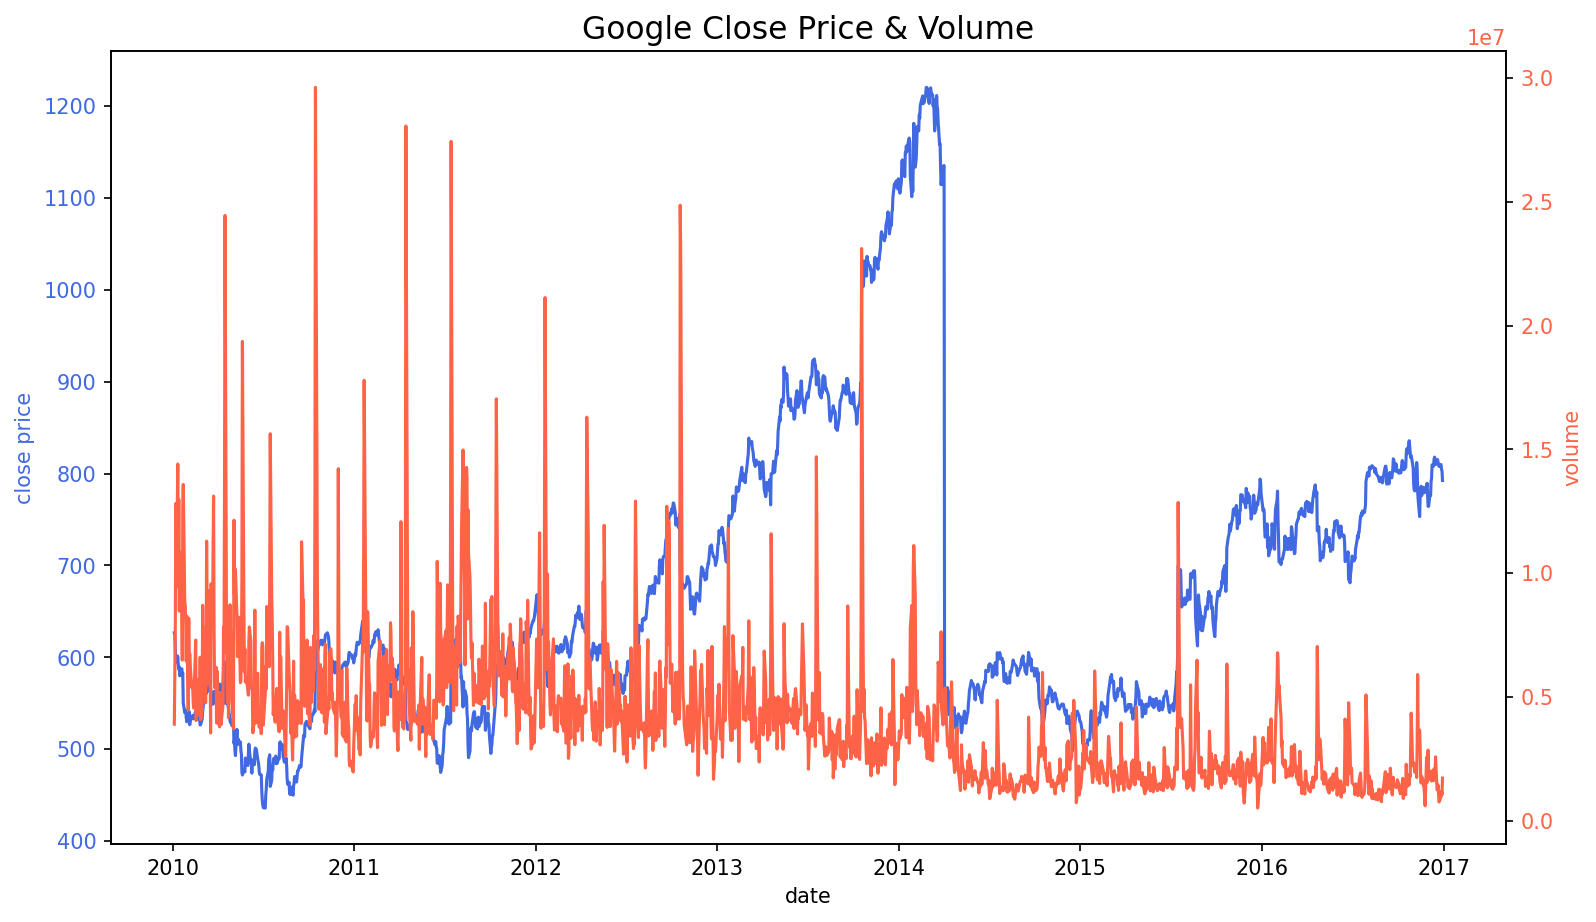

In [31]:
fig, ax1 = plt.subplots(figsize=(12, 7), dpi=150)

# First Plot
color = 'royalblue'
ax1.plot(google.index, google['close'], 
         color=color)
ax1.set_xlabel('date')
ax1.set_ylabel('close price', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Second Plot , 이중축
ax2 = ax1.twinx()
color = 'tomato'

ax2.plot(google.index, google['volume'], color=color)
ax2.set_ylabel('volume', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('Google Close Price & Volume', loc='center', fontsize=15)

plt.show()

* 한 데이터에 대해 다른 단위(ex. radian & degree)
    * `.secondary_xaxis()`[참고](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html), `secondary_yaxsis()`

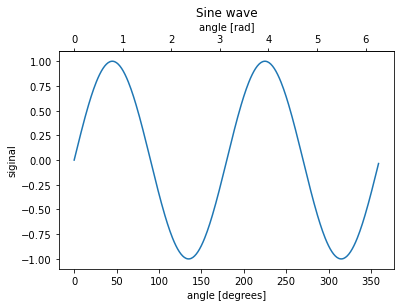

In [34]:
def deg2rad(x):
    return x * np.pi / 180

def rad2deg(x):
    return x * 180 / np.pi

fig, ax = plt.subplots()
x = np.arange(0, 360)
y = np.sin(2 * x * np.pi / 180)

ax.plot(x, y)
ax.set_xlabel("angle [degrees]")
ax.set_ylabel('siginal')
ax.set_title('Sine wave')

# dual axis, x축을 변경하기에 x축을 변경하는 기준을 알려줘야 한다.
secax = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))
secax.set_xlabel('angle [rad]')

plt.show()

### 2.5. ETC
* 라인 끝 단에 레이블을 추가하면 식별에 도움(범례 대신)

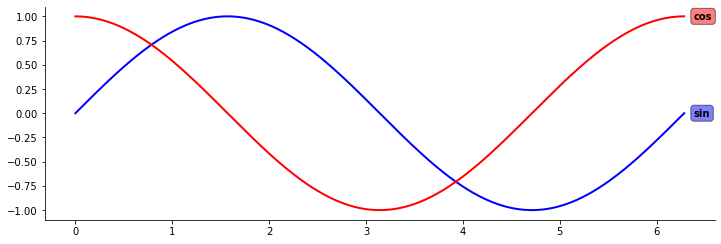

In [35]:
fig = plt.figure(figsize=(12, 5))

x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

ax = fig.add_subplot(111, aspect=1)
ax.plot(x, y1,
       color='blue',
       linewidth=2,)
ax.plot(x, y2,
       color='red',
       linewidth=2,)

ax.text(x[-1]+0.1, y1[-1], s='sin', fontweight='bold',
       va='center', ha='left',
       bbox=dict(boxstyle='round,pad=0.3', fc='blue', ec='black', alpha=0.5))

ax.text(x[-1]+0.1, y2[-1], s='cos', fontweight='bold',
       va='center', ha='left',
       bbox=dict(boxstyle='round,pad=0.3', fc='red', ec='black', alpha=0.5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

* Annatation : Min/Max 정보(또는 원하는 포인트)는 추가해주면 도움이 될 수 있음

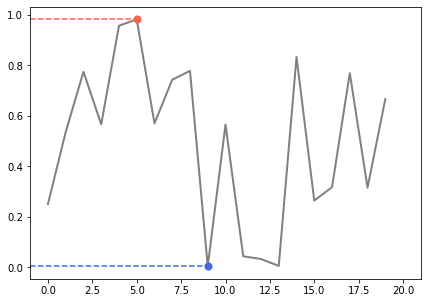

In [46]:
fig = plt.figure(figsize=(7, 5))

x = np.arange(20)
y = np.random.rand(20)

ax = fig.add_subplot(111)
ax.plot(x, y,
       color='gray',
       linewidth=2,)

ax.set_xlim(-1, 21)

# max
ax.plot([-1, x[np.argmax(y)]], [np.max(y)]*2,
        linestyle="--", color='tomato')

ax.scatter(x[np.argmax(y)], np.max(y),
          c='tomato', s=50, zorder=20)

# min
ax.plot([-1, x[np.argmin(y)]], [np.min(y)]*2,
        linestyle='--', color='royalblue')

ax.scatter(x[np.argmin(y)], np.min(y),
          c='royalblue', s=50, zorder=20)

plt.show()

* 보다 연한 색을 사용해 uncertainty 표현 가능(신뢰구간, 분산 등)